## LoopDetect - Python

Testing in Python 3.12 environment

In [2]:
# Import LoopDetect core and numpy
import numpy as np
import loopdetect.core as ld
import loopdetect.examples as lde
# An example ODE system with function func_POSm4 is provided in
# loopdetect.examples, it has 4 variables.
# Variable values for the 4 variables (as tuple, cast into a list)
s_star = [(1,1,1,1)]
# Define further arguments of func_POSm4
klin = np.ones((8,))
knonlin = (2.5,3)
# compute loops
res_tab = ld.find_loops_vset(lde.func_POSm4,vset=s_star,klin=klin,
                   knonlin=knonlin,max_num_loops=10)
# The loop list, a pandas dataframe, is accessed like this:
res_tab['loop_rep'][0]

d:\Work\StudentJob\Jana Wolf\LoopDetect_2025\env\lib\loopdetect_python_3.12\Lib\site-packages\loopdetect\examples.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


,loop,length,sign
0,"(0, 1, 2, 3, 0)",4,-1
1,"(1, 2, 3, 1)",3,1
2,"(0, 0)",1,-1
3,"(1, 1)",1,-1
4,"(2, 2)",1,-1
5,"(3, 3)",1,-1


In [85]:
print(res_tab['loop_rep'][0])

              loop  length  sign
0  (0, 1, 2, 3, 0)       4    -1
1     (1, 2, 3, 1)       3     1
2           (0, 0)       1    -1
3           (1, 1)       1    -1
4           (2, 2)       1    -1
5           (3, 3)       1    -1


##### **Note**:
- The `lde.func_POSm4` is a network consists of 4 nodes, describe by 4 differential equations
- Detaid:

```
def func_POSm4(x,klin,knonlin):
    ...
    dx = np.zeros(4)
    dx[0] = klin[0]-(klin[1]*(1 + x[3]/pow(knonlin[0],knonlin[1])) + klin[2])*x[0]
    dx[1] = klin[1]*(1 + x[3]/pow(knonlin[0],knonlin[1]))*x[0] - (klin[3] + klin[4])*x[1]
    dx[2] = klin[3]*x[1] - (klin[5] + klin[6])*x[2]
    dx[3] = klin[5]*x[2] - klin[7]*x[3]
    return(dx)
```

In [44]:
help(pow)

Help on built-in function pow in module builtins:

pow(base, exp, mod=None)
    Equivalent to base**exp with 2 arguments or base**exp % mod with 3 arguments

    Some types, such as ints, are able to use a more efficient algorithm when
    invoked using the three argument form.



In [3]:
def func_POSm4_fix(x, klin, knonlin):
    # dx = np.zeros(4)
    # dx[0] = klin[0]-(klin[1]*(1 + pow(x[3]/knonlin[0],knonlin[1])) + klin[2])*x[0]
    # dx[1] = klin[1]*(1 + pow(x[3]/knonlin[0],knonlin[1]))*x[0] - (klin[3] + klin[4])*x[1]
    # dx[2] = klin[3]*x[1] - (klin[5] + klin[6])*x[2]
    # dx[3] = klin[5]*x[2] - klin[7]*x[3]
    # return(dx)

    fb = 1 + (x[3] / knonlin[0])**knonlin[1]

    dx = np.zeros(4)
    dx[0] = klin[0] - klin[1] * x[0] * fb - klin[2] * x[0]
    dx[1] = klin[1] * x[0] * fb - klin[3] * x[1] - klin[4] * x[1]
    dx[2] = klin[3] * x[1] - klin[5] * x[2] - klin[6] * x[2]
    dx[3] = klin[5] * x[2] - klin[7] * x[3]
    return dx


In [4]:
res_tab = ld.find_loops_vset(func_POSm4_fix,vset=s_star,klin=klin,
                   knonlin=knonlin,max_num_loops=10)
# The loop list, a pandas dataframe, is accessed like this:
res_tab['loop_rep'][0]

,loop,length,sign
0,"(0, 1, 2, 3, 0)",4,-1
1,"(1, 2, 3, 1)",3,1
2,"(0, 0)",1,-1
3,"(1, 1)",1,-1
4,"(2, 2)",1,-1
5,"(3, 3)",1,-1


In [2]:
# Define a new model to be used with LoopDetect
def func_newmodel(x, a, b):
    dx1 = a * x[0] - b * x[0] * x[1]
    dx2 = -a * x[1] + b * x[0] * x[1]
    return np.array([dx1, dx2])

# Variable values for the 2 variables (as tuple, cast into a list)
s_star_new = [(2, 3)]
# Define further arguments of func_newmodel
args_new = (1.0, 0.5) # a=1.0, b=0.5
# compute loops for the new model
res_tab_new = ld.find_loops_vset(func_newmodel, vset=s_star_new,
                                 a=args_new[0], b=args_new[1],
                                 max_num_loops=10)
# The loop list, a pandas dataframe, is accessed like this:
res_tab_new['loop_rep'][0]
# This is an example script showing how to use LoopDetect to find loops
# in ODE systems. It first uses an example model provided in LoopDetect,
# then defines a new model and uses LoopDetect on it.

,loop,length,sign
0,"(0, 1, 0)",2,-1
1,"(0, 0)",1,-1


In [11]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "cm",
    "text.usetex": True,  # requires LaTeX installation
    "axes.linewidth": 1.2,
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 14,
    "figure.dpi": 300,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "xtick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.major.size": 6,
    "ytick.minor.size": 3,
    "xtick.major.width": 1.0,
    "ytick.major.width": 1.0,
})

In [39]:
# colors = ["tab:blue", "tab:green", "tab:orange", "tab:red", "tab:purple", "black"]
# colors = plt.cm.viridis(np.linspace(0, 1, 6))
colors = ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']
# colors = ['#D46362','#BD353A', '#5E97D0', '#256FB0', '#F2B134', '#B27D2C', '#4EB265', '#2E8540']

In [35]:
colors[::2]

['#BD353A', '#5E97D0', '#F2B134', '#4EB265']

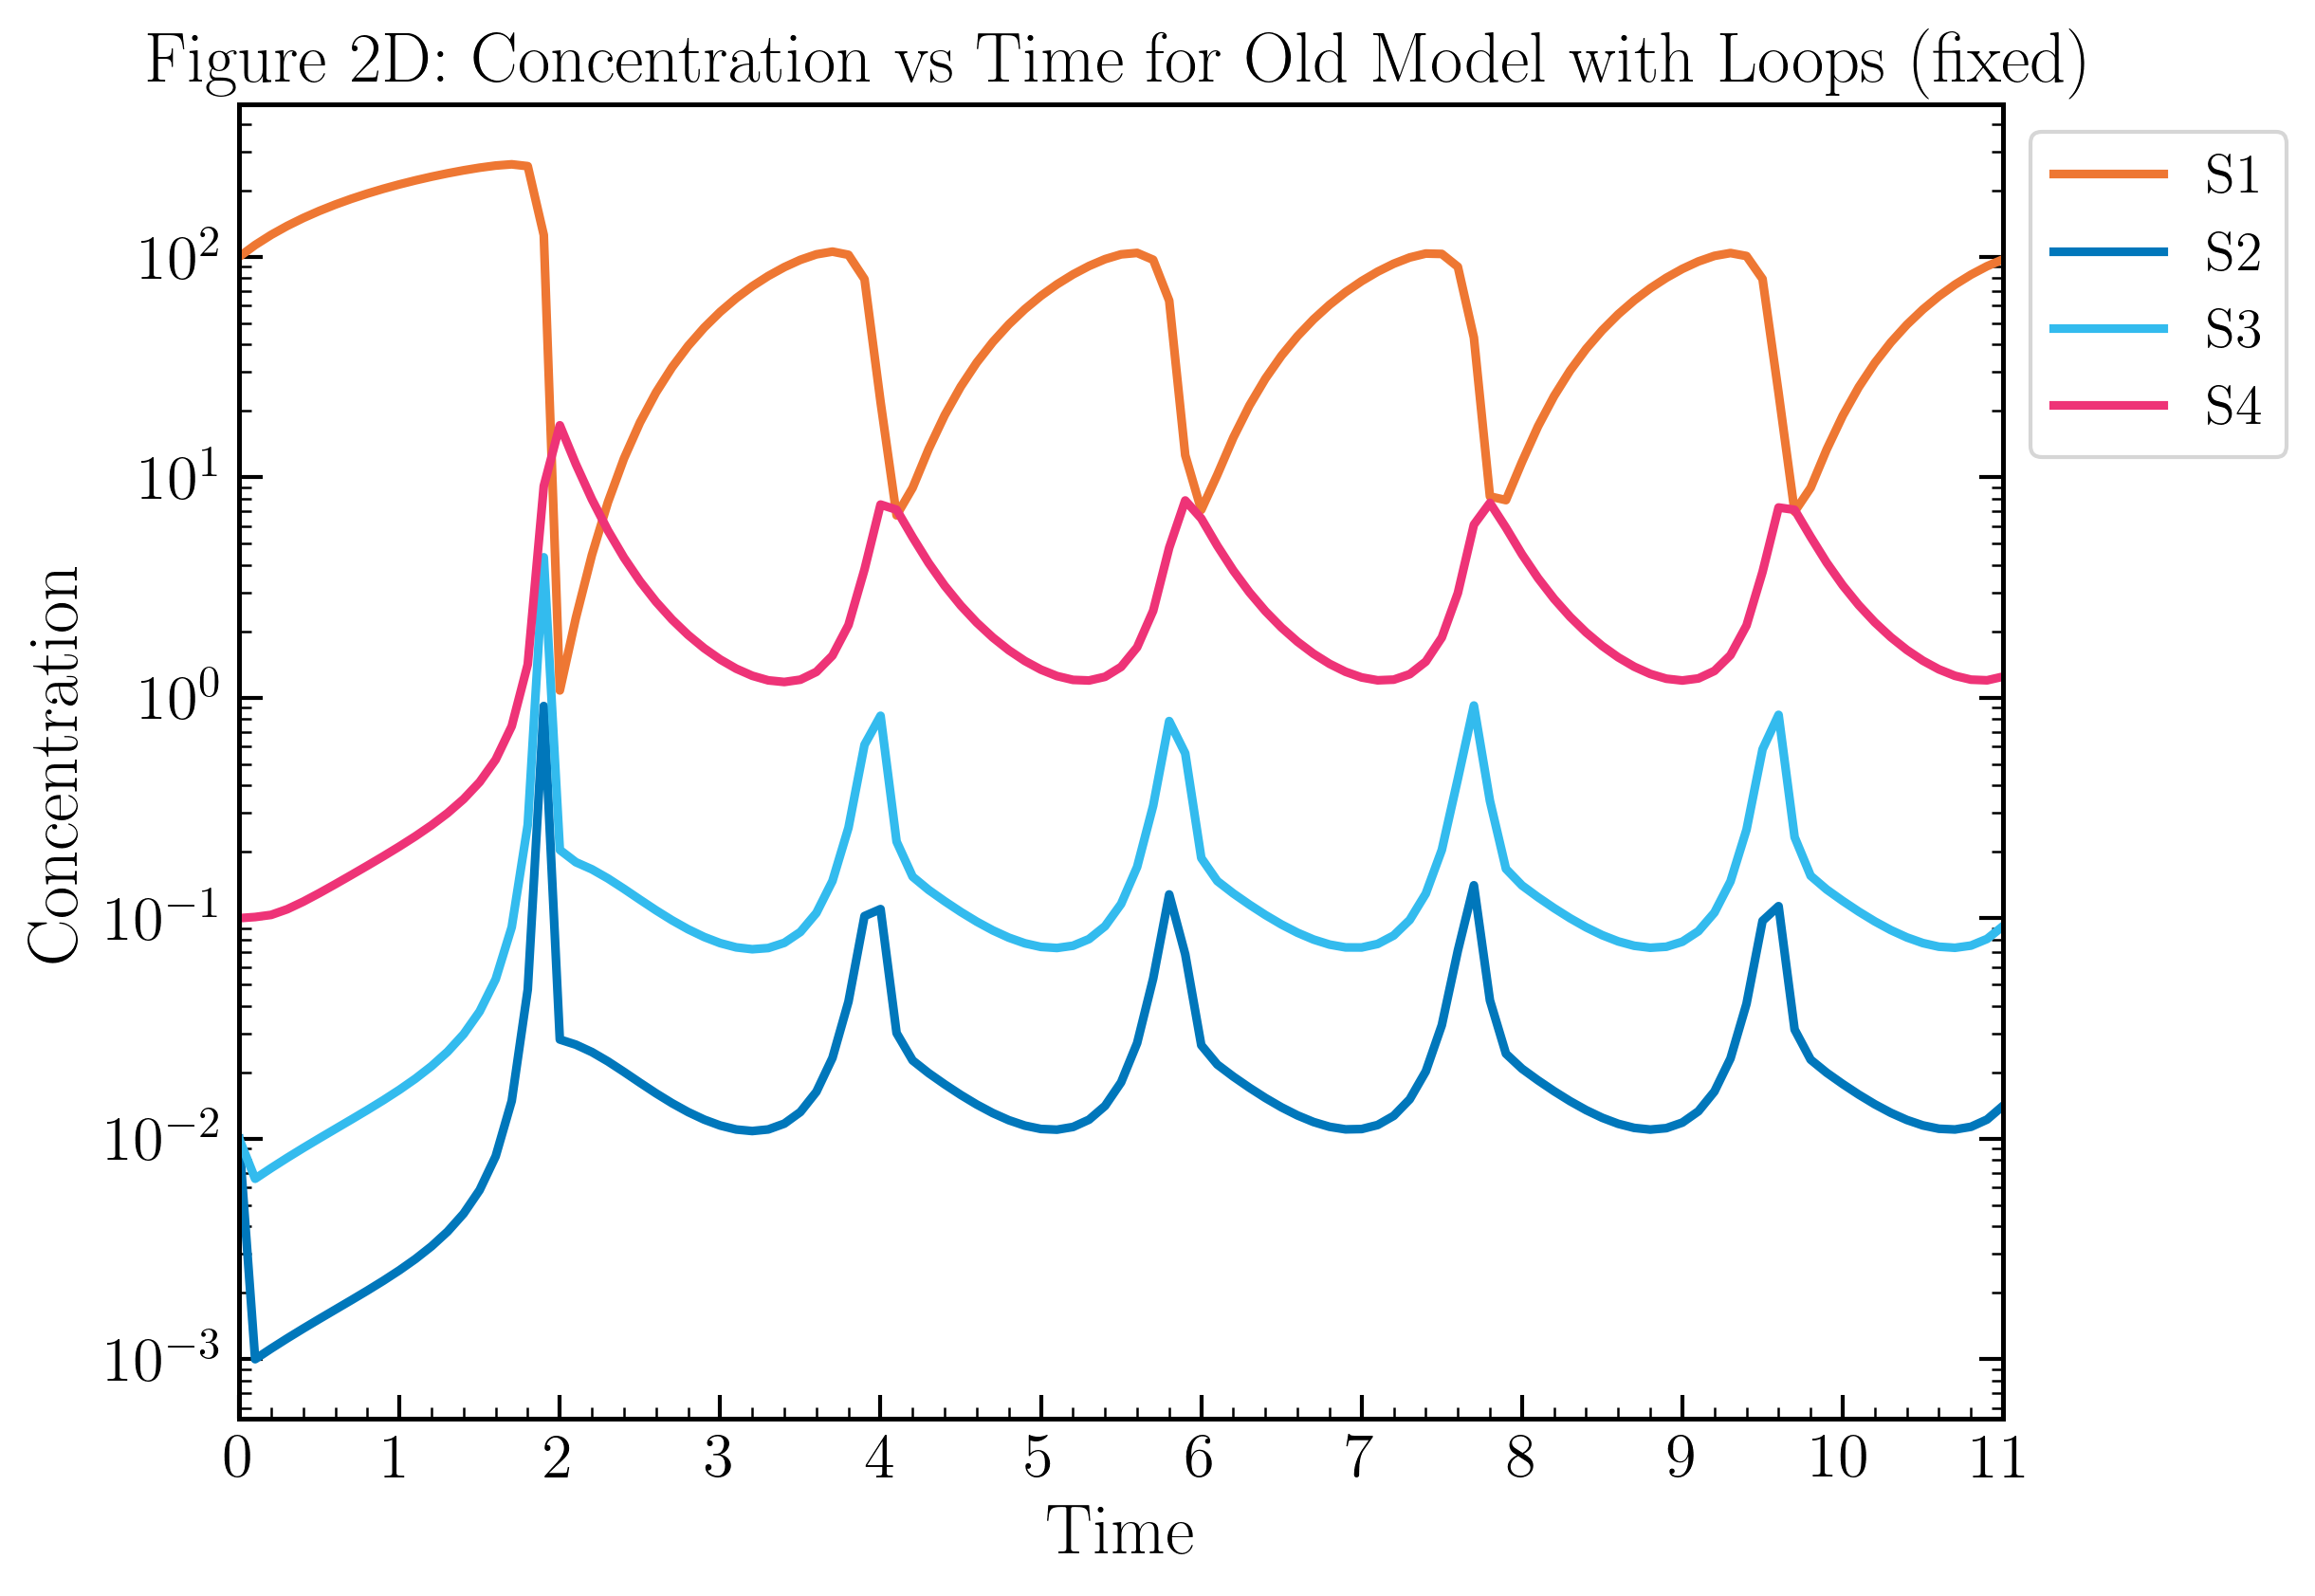

In [41]:
# Draw plot concentration vs time for the old model with loops

def solve_POSm4(initial_conditions, time_points, klin, knonlin):
    def model(x, t):
        return func_POSm4_fix(x, klin, knonlin)
    sol = odeint(model, initial_conditions, time_points)
    return sol

klin = (165,0.044,0.27,550,5000,78,4.4,5.1)
knonlin = (0.3,2)

time_points = np.linspace(0, 11, 111)
initial_conditions = [10**2, 10**(-2), 10**(-2), 10**(-1)]# s_star[0]
sol = solve_POSm4(initial_conditions, time_points,
                        klin=klin, knonlin=knonlin)
# Add S1, S2, S3, S4 legends

plt.figure(figsize=(8, 6))
for i, c in enumerate(colors[:4]):
    plt.plot(time_points, sol[:, i], lw=2.2, color=c, label=f"S{i+1}")

# plt.plot(time_points, sol, label=['S1', 'S2', 'S3', 'S4'], color=colors[:4])
plt.xlabel('Time')
plt.xlim(0, 11)
plt.xticks(np.arange(0, 12, 1))
plt.ylabel('Concentration')
plt.gca().yaxis.set_ticks_position('both')
# plt.gca().yaxis.set_tick_params(direction='inout')
# Log scale for y-axis
plt.yscale('log')
plt.title('Figure 2D: Concentration vs Time for Old Model with Loops (fixed)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

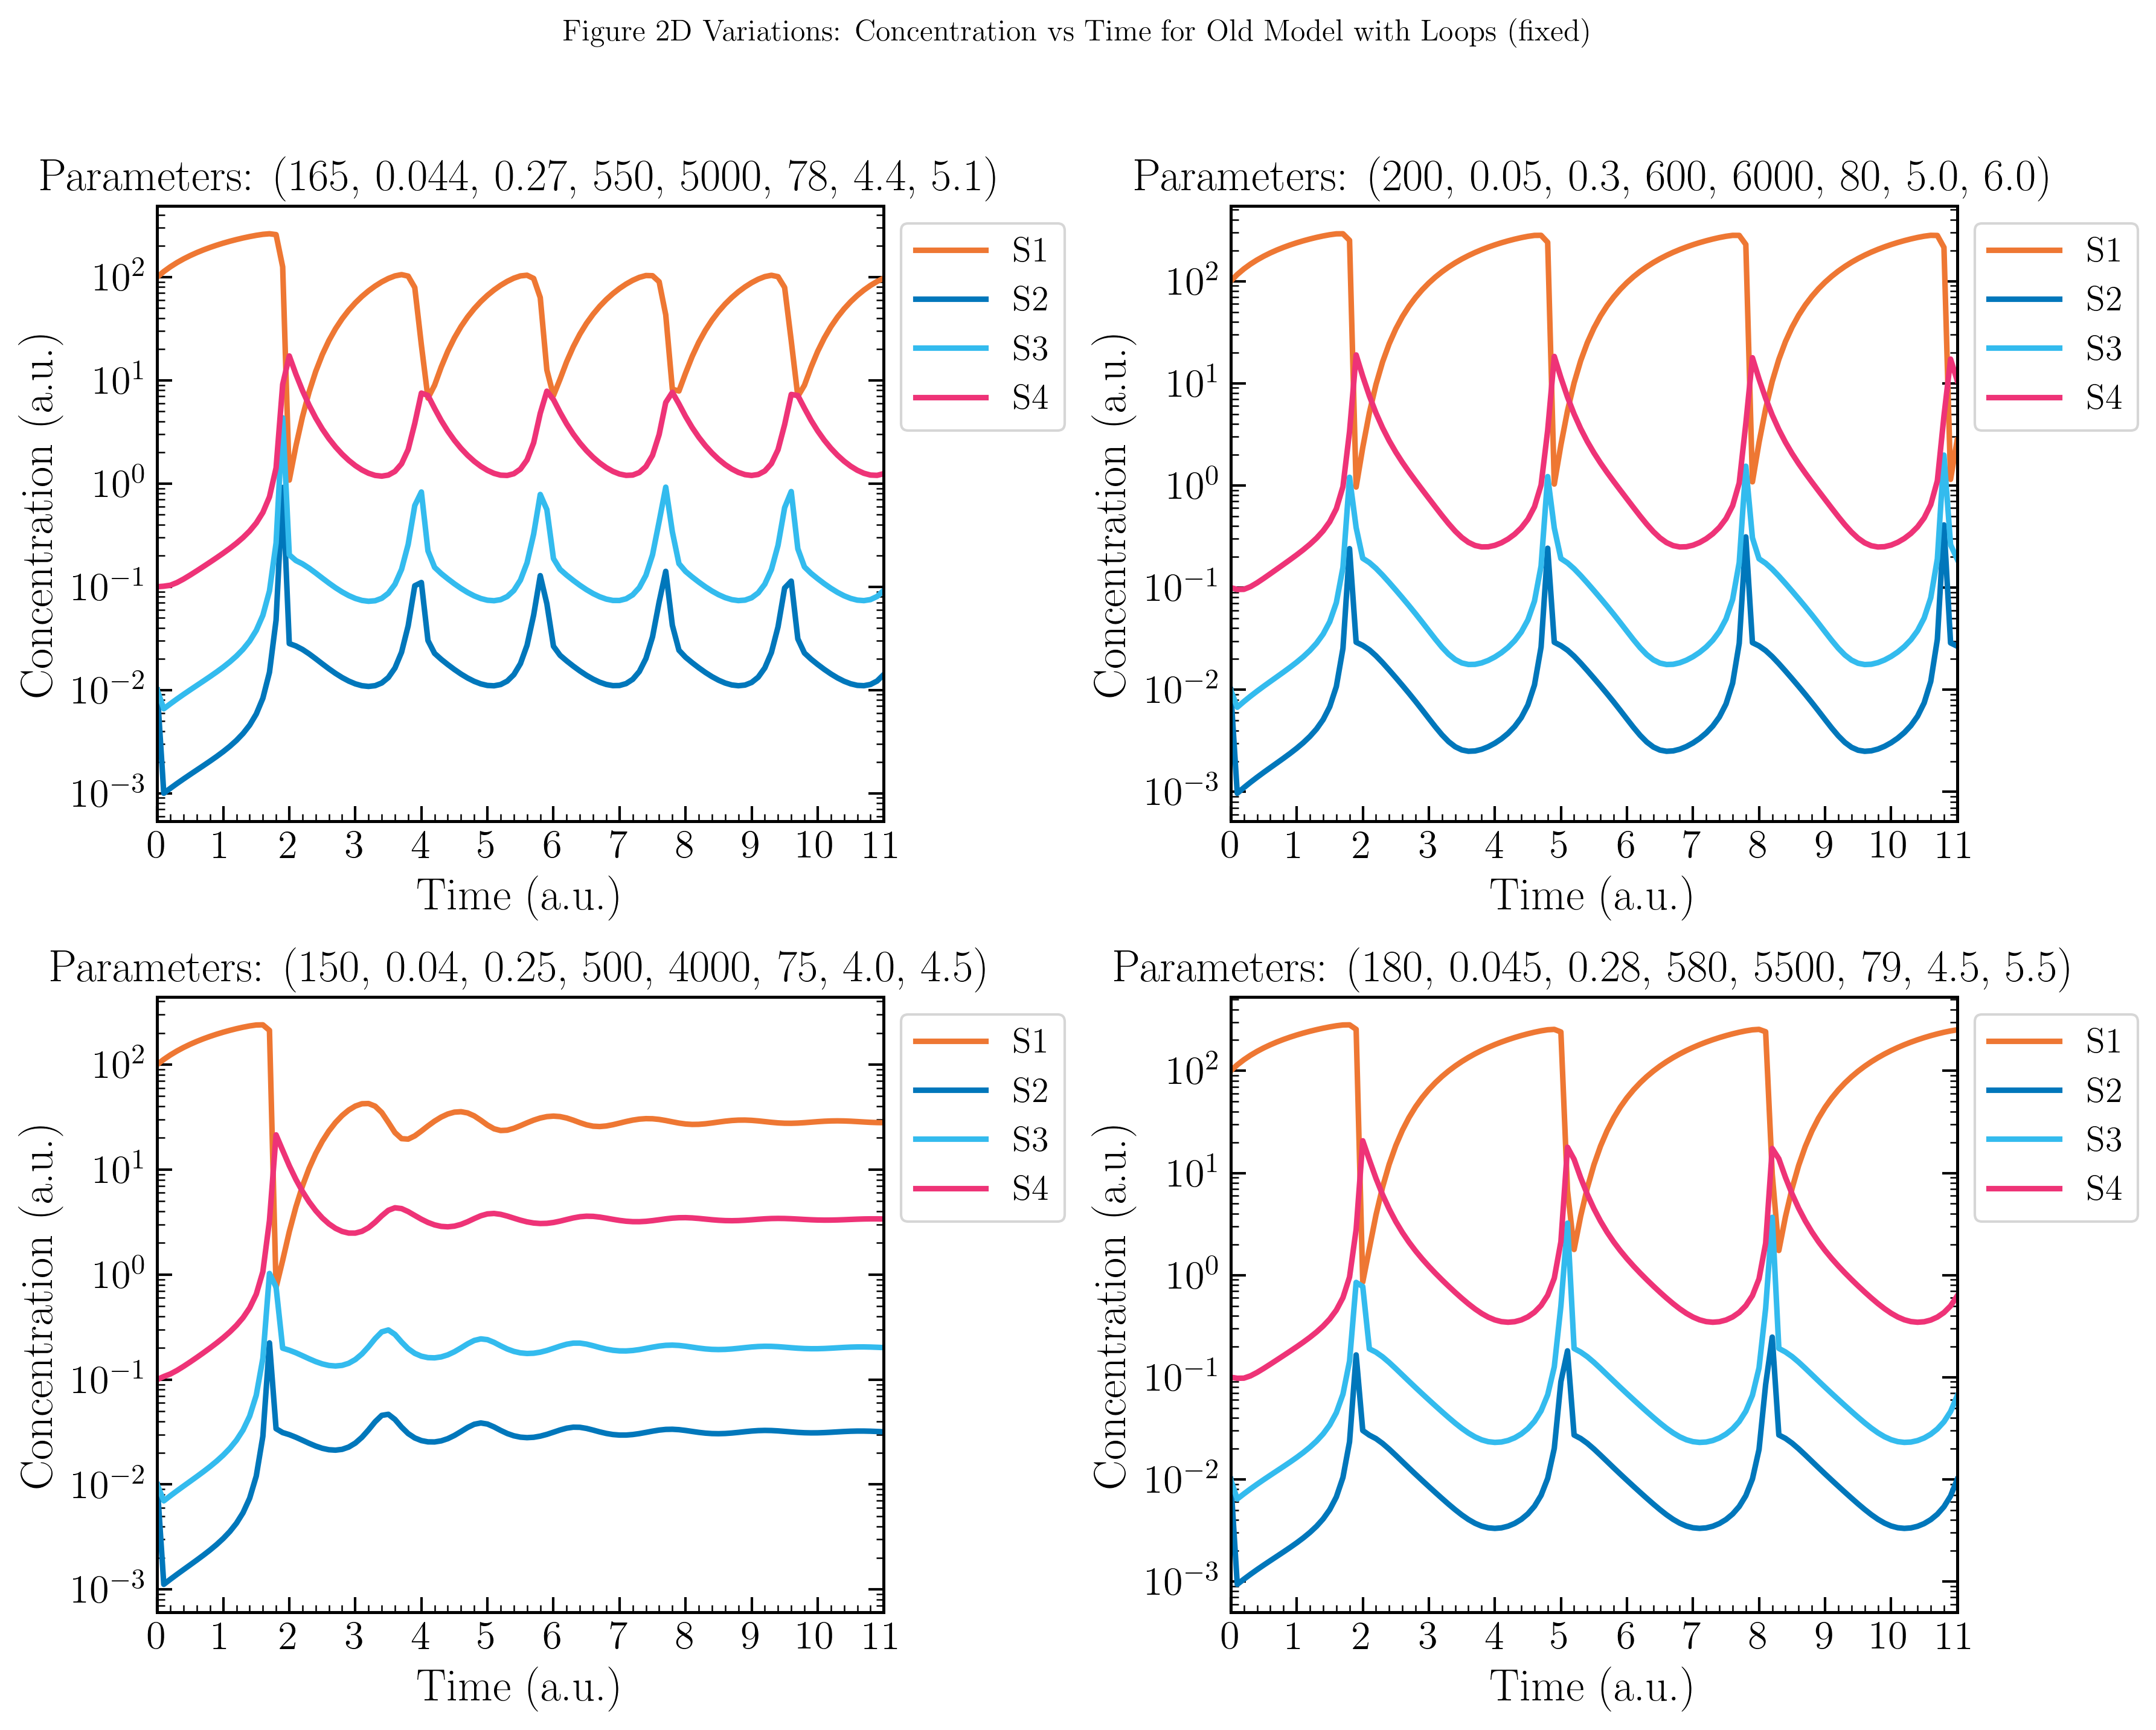

In [29]:
# Create 2x2 plots to try different parameters for the fixed model
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
param_sets = [
    (165, 0.044, 0.27, 550, 5000, 78, 4.4, 5.1),
    (200, 0.05, 0.3, 600, 6000, 80, 5.0, 6.0),
    (150, 0.04, 0.25, 500, 4000, 75, 4.0, 4.5),
    (180, 0.045, 0.28, 580, 5500, 79, 4.5, 5.5)
]
for ax, params in zip(axs.flatten(), param_sets):
    klin = params
    sol = solve_POSm4(initial_conditions, time_points,
                            klin=klin, knonlin=knonlin)
    for i, c in enumerate(colors[:4]):
        ax.plot(time_points, sol[:, i], lw=2.2, color=c, label=f"S{i+1}")
    # ax.plot(time_points, sol, label=['S1', 'S2', 'S3', 'S4'])
    ax.set_xlabel('Time (a.u.)', weight='bold')
    ax.set_xlim(0, 11)
    ax.set_xticks(np.arange(0, 12, 1))
    # Show tick marks in both left and right y-axes
    ax.yaxis.set_ticks_position('both')
    ax.set_ylabel('Concentration (a.u.)', weight='bold')
    ax.set_yscale('log')
    ax.set_title(f'Parameters: {params}')
    # Make legend outside the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    # ax.legend()
plt.suptitle('Figure 2D Variations: Concentration vs Time for Old Model with Loops (fixed)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#Show in 300 dpi
plt.gcf().set_dpi(300)
plt.show()

d:\Work\StudentJob\Jana Wolf\LoopDetect_2025\env\lib\loopdetect_python_3.12\Lib\site-packages\loopdetect\examples.py:208: RuntimeWarning: overflow encountered in scalar multiply
  dx[0] = klin[0]-(klin[1]*(1 + x[3]/pow(knonlin[0],knonlin[1])) + klin[2])*x[0]
d:\Work\StudentJob\Jana Wolf\LoopDetect_2025\env\lib\loopdetect_python_3.12\Lib\site-packages\loopdetect\examples.py:209: RuntimeWarning: overflow encountered in scalar multiply
  dx[1] = klin[1]*(1 + x[3]/pow(knonlin[0],knonlin[1]))*x[0] - (klin[3] + klin[4])*x[1]
C:\Users\Admin\AppData\Local\Temp\ipykernel_27908\3659428777.py:16: RuntimeWarning: invalid value encountered in add
  X = X + dXdt * (time_points[1] - time_points[0])


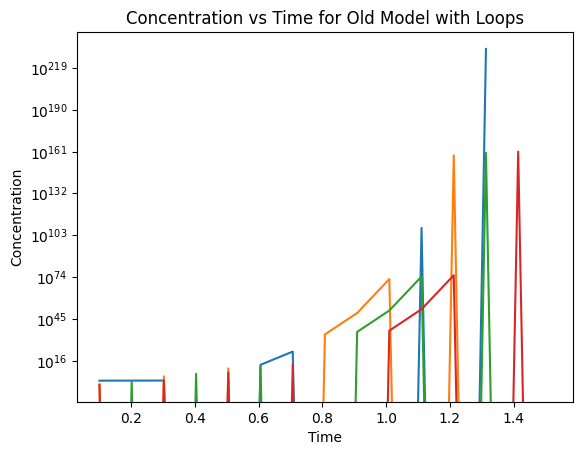

In [57]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# Draw plot concentration vs time for the old model with loops

klin = (165,0.044,0.27,550,5000,78,4.4,5.1)
knonlin = (0.3,2)

time_points = np.linspace(0, 10, 100)
initial_conditions = [10**2, 10**(-3), 10**(-2), 10**(-1)]# s_star[0]

X = initial_conditions
sol = [None, None, None, None]

for t in time_points[:-1]:
    dXdt = lde.func_POSm4(X, klin, knonlin)
    X = X + dXdt * (time_points[1] - time_points[0])
    sol = np.vstack([sol, X]) if 'sol' in locals() else X
    
plt.plot(time_points, sol)
plt.xlabel('Time')
plt.ylabel('Concentration')
# Log scale for y-axis
plt.yscale('log')
plt.title('Concentration vs Time for Old Model with Loops')
# plt.gcf().set_dpi(300)
plt.show()

In [26]:
klin = (165,0.044,0.27,550,5000,78,4.4,5.1)
knonlin = (0.3,2)
# Define a helper function: odeint requires a function depending
# only on the variables (first argument) and the time, t, but
# func_POSm4 is independent from t and carries two more arguments
# (klin, knonlin).
def func_POSm4_help(x,t):
        return(lde.func_POSm4(x,klin,knonlin))
# Solve the system using odeint at time points 0, 1, ..., 100,
# initial vector: (1,2,3,4)
sol = odeint(func_POSm4_help, y0 = (1,2,3,4),
        t = np.linspace(0,100,11))
# We set the last point of the numeric solution as point of interest
s_star = sol[-1]

C:\Users\Admin\AppData\Local\Temp\ipykernel_27908\3783449936.py:11: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(func_POSm4_help, y0 = (1,2,3,4),


In [29]:
res_tab_2 = ld.find_loops_vset(lde.func_POSm4,vset=[s_star],
                   klin=klin, knonlin=knonlin,max_num_loops=10)
print(f"klin={klin}, knonlin={knonlin}")
res_tab_2['loop_rep'][0]

klin=(165, 0.044, 0.27, 550, 5000, 78, 4.4, 5.1), knonlin=(0.3, 2)


,loop,length,sign
0,"(0, 1, 2, 3, 0)",4,-1
1,"(1, 2, 3, 1)",3,1
2,"(0, 0)",1,-1
3,"(1, 1)",1,-1
4,"(2, 2)",1,-1
5,"(3, 3)",1,-1


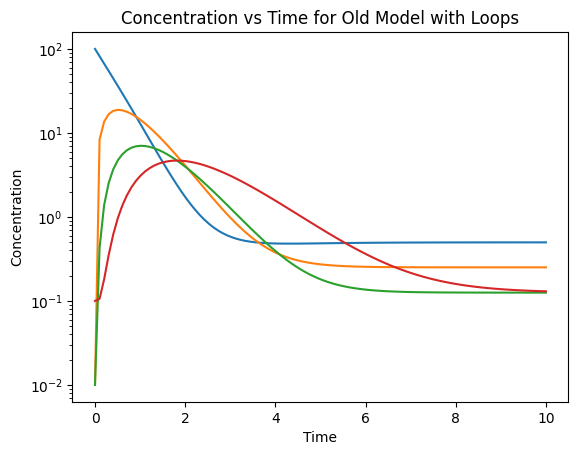

In [23]:
# Try solve_ivp instead of odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
# Draw plot concentration vs time for the old model with loops
def model_ivp(t, x, klin, knonlin):
    return lde.func_POSm4(x, klin, knonlin)
time_points = np.linspace(0, 10, 100)
initial_conditions = [10**2, 10**(-2), 10**(-2), 10**(-1)]# s_star[0]
sol_ivp = solve_ivp(model_ivp, [time_points[0], time_points[-1]], initial_conditions,
                    t_eval=time_points, args=(klin, knonlin), method='RK45', rtol=1e-6)
plt.plot(sol_ivp.t, sol_ivp.y.T)
plt.xlabel('Time')
plt.ylabel('Concentration')
# Log scale for y-axis
plt.yscale('log')
plt.title('Concentration vs Time for Old Model with Loops')
plt.show()

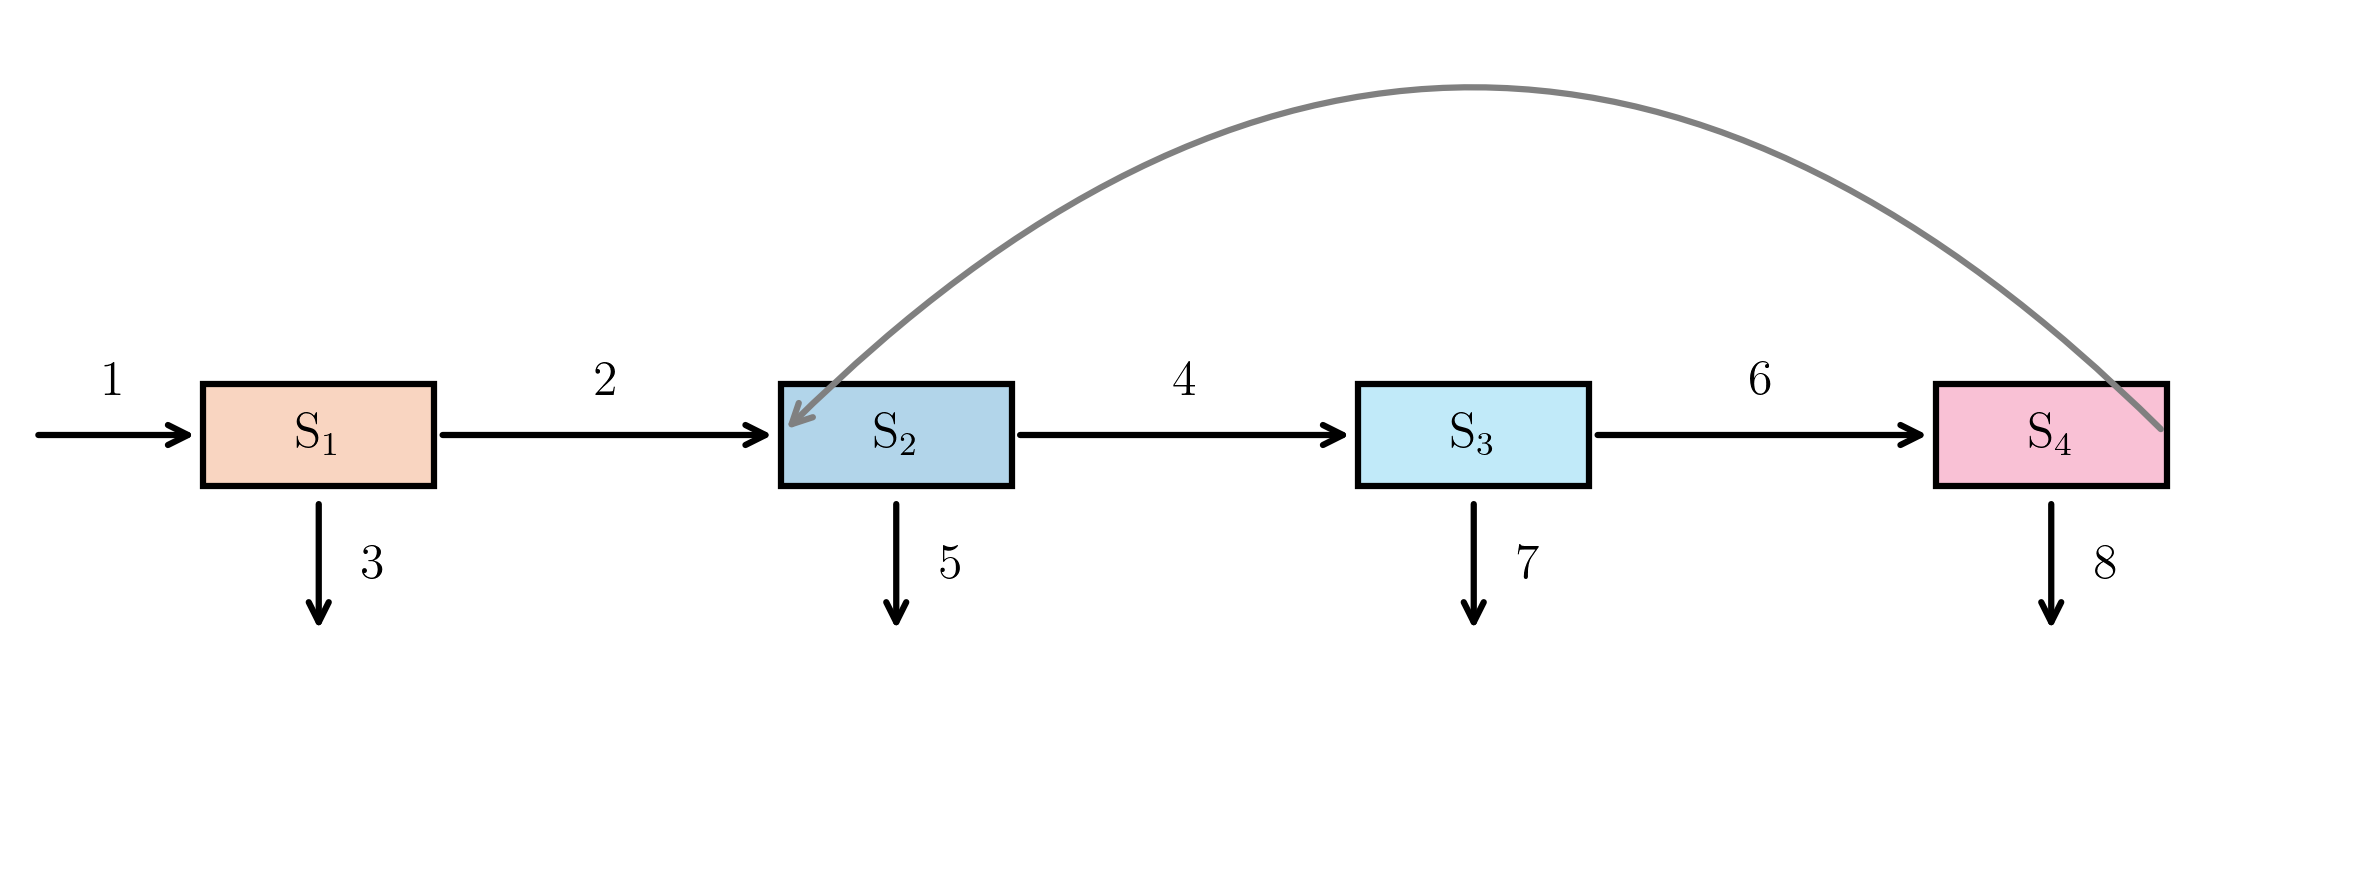

In [91]:
from matplotlib.patches import FancyArrowPatch, Rectangle

# ---------------------------------------------------------
# Helper function: draw a state box with label
# ---------------------------------------------------------
def draw_state(ax, center, label, color):
    x, y = center
    w, h = 0.8, 0.5
    rect = Rectangle((x - w/2, y - h/2), w, h,
                     linewidth=1.5, edgecolor=None,
                     facecolor=color, alpha=0.3)
    rect_2 = Rectangle((x - w/2, y - h/2), w, h,
                     linewidth=1.5, edgecolor="black",
                     fill=False)
    ax.add_patch(rect)
    ax.add_patch(rect_2)
    ax.text(x, y, label, ha="center", va="center", fontsize=12)
    return (x, y, w, h)

# ---------------------------------------------------------
# Helper: draw straight arrow between two centers
# ---------------------------------------------------------
def arrow(ax, start, end, text=None, y_offset=0.0):
    x1, y1 = start
    x2, y2 = end
    arr = FancyArrowPatch(
        (x1, y1 + y_offset), (x2, y2 + y_offset),
        arrowstyle='->', mutation_scale=12, linewidth=1.5, color='black'
    )
    ax.add_patch(arr)
    if text:
        ax.text((x1+x2)/2, y1 + y_offset + 0.15, text,
                ha="center", va="bottom", fontsize=12)

# ---------------------------------------------------------
# Build figure
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 3))

# Node positions (all on same horizontal line)
y0 = 0
S1 = draw_state(ax, (0, y0), "S$_1$", colors[0])
S2 = draw_state(ax, (2, y0), "S$_2$", colors[1])
S3 = draw_state(ax, (4, y0), "S$_3$", colors[2])
S4 = draw_state(ax, (6, y0), "S$_4$", colors[3])

# ---------------------------------------------------------
# Straight horizontal arrows (1→S1, S1→S2, S2→S3, S3→S4)
# ---------------------------------------------------------
arrow(ax, (-1.0, y0), (S1[0]-0.4, y0), "1")        # left input
arrow(ax, (S1[0]+0.4, y0), (S2[0]-0.4, y0), "2")
arrow(ax, (S2[0]+0.4, y0), (S3[0]-0.4, y0), "4")
arrow(ax, (S3[0]+0.4, y0), (S4[0]-0.4, y0), "6")

# Vertical output arrows (3, 5, 7, 8)
for (cx, cy, _, _), label in zip([S1, S2, S3, S4], ["3", "5", "7", "8"]):
    arr = FancyArrowPatch((cx, cy - 0.3), (cx, cy - 1.0),
                          arrowstyle='->', mutation_scale=12,
                          linewidth=1.5, color="black")
    ax.add_patch(arr)
    ax.text(cx + 0.15, cy - 0.65, label, fontsize=12, va="center")

# ---------------------------------------------------------
# Feedback arc S4 → S2 (curved)
# ---------------------------------------------------------
curve = FancyArrowPatch(
    (S4[0]+0.4, y0), (S2[0]-0.4, y0),
    arrowstyle='->',
    mutation_scale=12,
    linewidth=1.5,
    connectionstyle="arc3,rad=0.5",
    color="gray"
)
ax.add_patch(curve)

# Label "??" for the feedback arc (number  ? )
ax.text((S4[0]+S2[0])/2, y0 + 1.0, "", fontsize=12)

# ---------------------------------------------------------
# Formatting
# ---------------------------------------------------------
ax.set_xlim(-1, 7)
ax.set_ylim(-2, 2)
ax.axis("off")

plt.tight_layout()
plt.show()


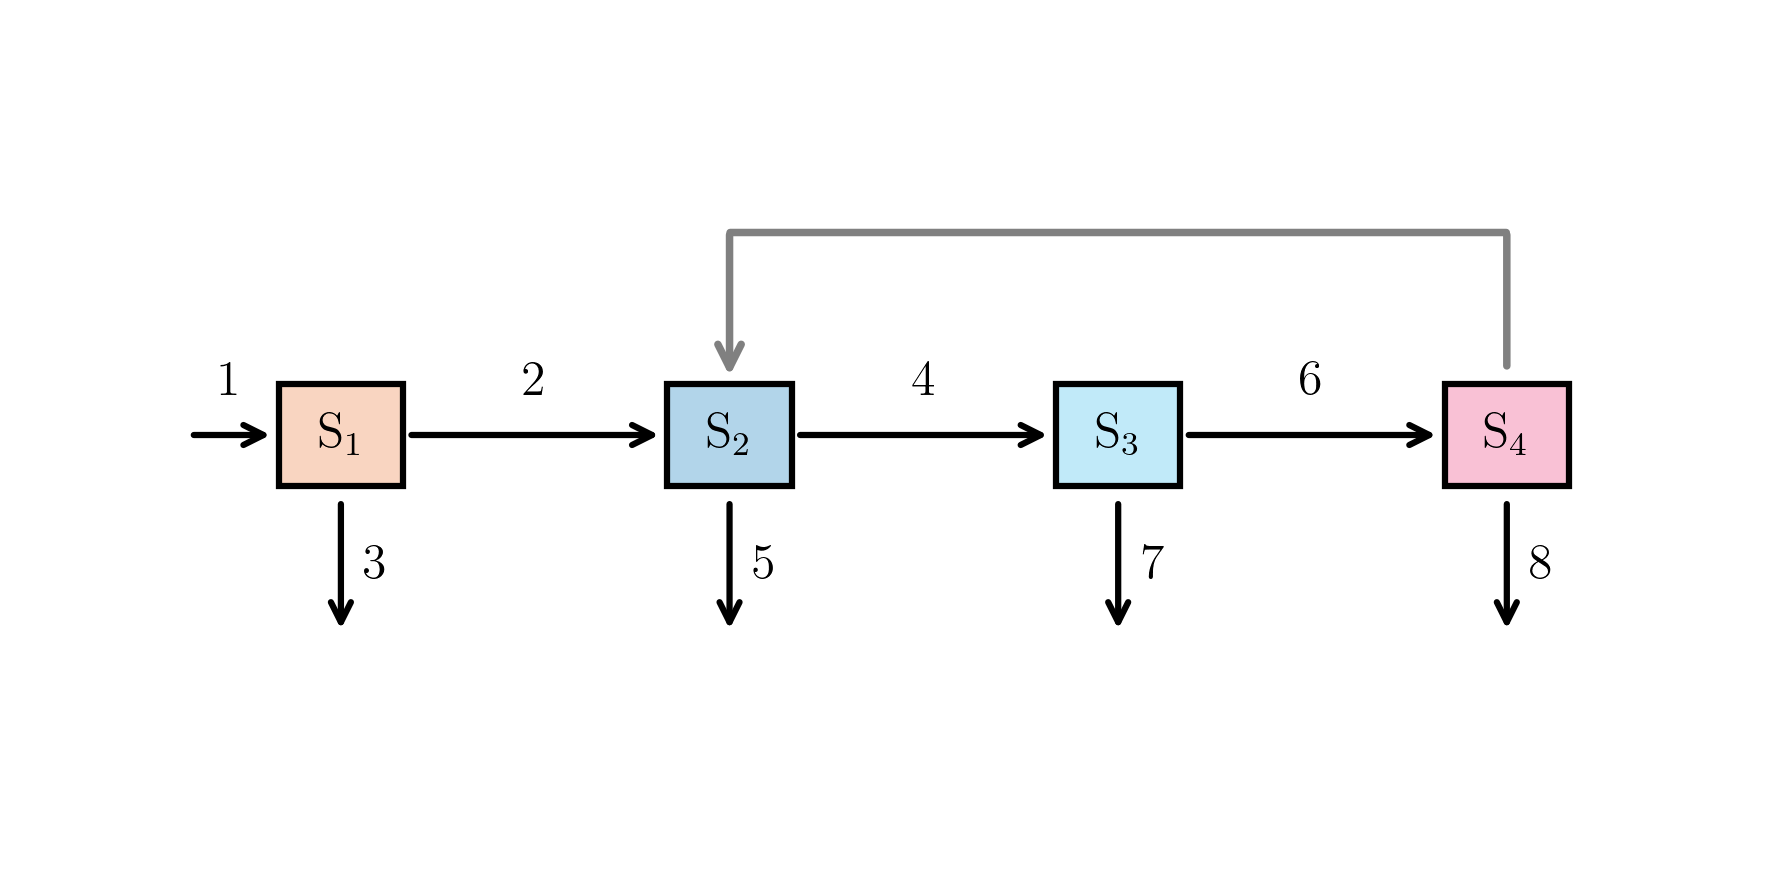

In [96]:
fig, ax = plt.subplots(figsize=(6, 3))

# Node positions (all on same horizontal line)
y0 = 0
S1 = draw_state(ax, (0, y0), "S$_1$", colors[0])
S2 = draw_state(ax, (2.5, y0), "S$_2$", colors[1])
S3 = draw_state(ax, (5.0, y0), "S$_3$", colors[2])
S4 = draw_state(ax, (7.5, y0), "S$_4$", colors[3])

# ---------------------------------------------------------
# Straight horizontal arrows (1→S1, S1→S2, S2→S3, S3→S4)
# ---------------------------------------------------------
arrow(ax, (-1.0, y0), (S1[0]-0.4, y0), "1")        # left input
arrow(ax, (S1[0]+0.4, y0), (S2[0]-0.4, y0), "2")
arrow(ax, (S2[0]+0.4, y0), (S3[0]-0.4, y0), "4")
arrow(ax, (S3[0]+0.4, y0), (S4[0]-0.4, y0), "6")

# Vertical output arrows (3, 5, 7, 8)
for (cx, cy, _, _), label in zip([S1, S2, S3, S4], ["3", "5", "7", "8"]):
    arr = FancyArrowPatch((cx, cy - 0.3), (cx, cy - 1.0),
                          arrowstyle='->', mutation_scale=12,
                          linewidth=1.5, color="black")
    ax.add_patch(arr)
    ax.text(cx + 0.15, cy - 0.65, label, fontsize=12, va="center")

# Example positions (use your own)
S1_pos = (0, 0)
S2_pos = (2.5, 0)
S3_pos = (5.0, 0)
S4_pos = (7.5, 0)

# Draw rectangular-corner feedback: S4 → S2
x4, y4 = S4_pos
x2, y2 = S2_pos

# Segment 1: Up
ax.add_patch(FancyArrowPatch(
    (x4, y4+0.3), (x4, y4 + 1.03),
    arrowstyle='-', linewidth=1.8, color="gray"))

# Segment 2: Left
ax.add_patch(FancyArrowPatch(
    (x4+0.05, y4 + 1), (x2-0.05, y2 + 1),
    arrowstyle='-', linewidth=1.8, color="gray"))

# Segment 3: Down with arrow head
ax.add_patch(FancyArrowPatch(
    (x2, y2 + 1.03), (x2, y2+0.25),
    arrowstyle='->', mutation_scale=14, linewidth=1.8, color="gray"))

# ax.set_xlim(-1, 10)
# ax.set_ylim(-2, 3)
# ax.axis("off")
# plt.show()

# Label "??" for the feedback arc (number  ? )
ax.text((S4[0]+S2[0])/2, y0 + 1.0, "", fontsize=12)

# ---------------------------------------------------------
# Formatting
# ---------------------------------------------------------
ax.set_xlim(-2, 9)
ax.set_ylim(-2, 2)
ax.axis("off")

plt.tight_layout()
plt.show()



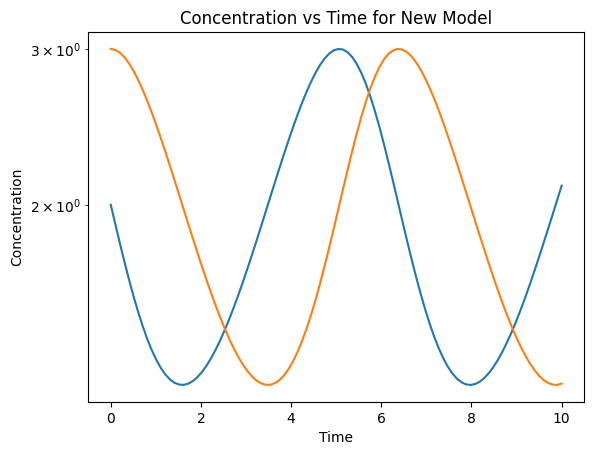

In [24]:
# Try with new model
# Draw plot concentration vs time for the new model

def model_new(t, x, a, b):
    return func_newmodel(x, a, b)

time_points = np.linspace(0, 10, 100)
initial_conditions = [2, 3]  # s_star_new[0]
sol_new = solve_ivp(model_new, [time_points[0], time_points[-1]], initial_conditions,
                    t_eval=time_points, args=args_new, method='RK45', rtol=1e-6)
plt.plot(sol_new.t, sol_new.y.T)
plt.xlabel('Time')
plt.ylabel('Concentration')
# Log scale for y-axis
plt.yscale('log')
plt.title('Concentration vs Time for New Model')
plt.show()